In [4]:
%matplotlib notebook
from QDP import qdp
import numpy as np
import matplotlib.pyplot as plt
import os.path
dp = '/home/ebert/jupyter-notebooks/FNode-data'

name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'fort_drop_us']
ivar:	0.0	retention:[ 0.8943662   0.88760807] +- [ 0.02174778  0.01425967]
ivar:	4.0	retention:[ 0.83108108  0.90810811] +- [ 0.02918682  0.01786148]
ivar:	8.0	retention:[ 0.86111111  0.9137931 ] +- [ 0.02885147  0.01789437]
ivar:	12.0	retention:[ 0.66901408  0.875     ] +- [ 0.0277703   0.01858365]
ivar:	16.0	retention:[ 0.65248227  0.74519231] +- [ 0.02896169  0.02541001]
ivar:	20.0	retention:[ 0.5         0.70714286] +- [ 0.02144303  0.0228717 ]
ivar:	24.0	retention:[ 0.43846154  0.57518797] +- [ 0.02115846  0.02548933]
ivar:	28.0	retention:[ 0.28472222  0.54166667] +- [ 0.02244018  0.02851188]
ivar:	32.0	retention:[ 0.36956522  0.4623431 ] +- [ 0.01187553  0.0191786 ]
ivar:	36.0	retention:[ 0.21768707  0.38363171] +- [ 0.01165878  0.02068164]
ivar:	40.0	retention:[ 0.2739726   0.32716049] +- [ 0.01536978  0.02192096]


<IPython.core.display.Javascript object>


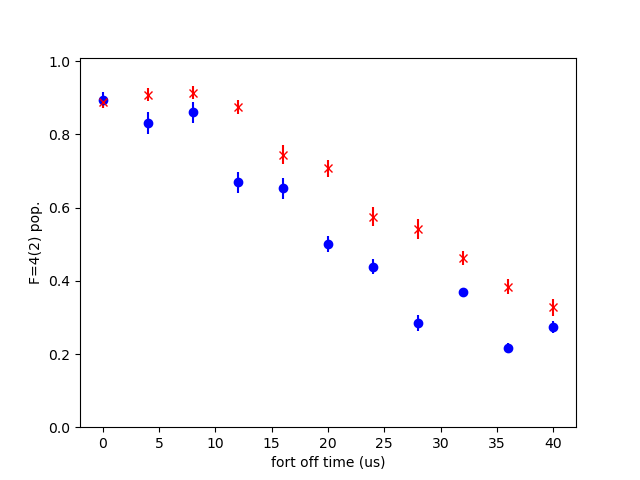

In [10]:
exp_name = '2018_04_18_08_19_40_temp-scan'
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])
roi_map = ['cs', 'rb']
cs_cuts = [[34],[3]]
rb_cuts = [[45],[3]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
retention = q.apply_thresholds()
tbl_str = "ivar:\t{0}\tretention:{1} +- {2}"
entries = np.product(retention['retention'].shape[:-1])
for i in range(entries):
    print(tbl_str.format(
        retention['ivar'].reshape((entries,-1))[i][0],
        retention['retention'].reshape((entries,-1))[i],
        retention['error'].reshape((entries,-1))[i]
    ))
# q.save_experiment_data()
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    for r in range(2):
        ax.errorbar(
            retention['ivar'][e, :, r], retention['retention'][e, :, r],
            yerr=retention['error'][e, :, r],
            fmt=['bo','rx'][r]
        )
ax.set_ylim(0, 1.01)
ax.set_xlabel(xlab)
ax.set_ylabel('F=4(2) pop.')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'retention_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


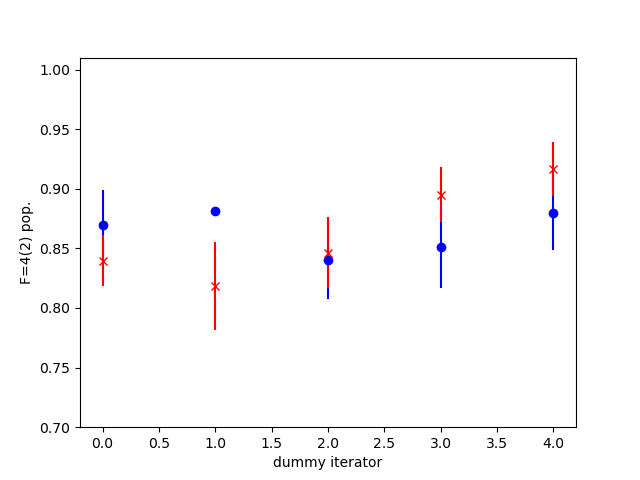

In [8]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    for r in range(2):
        ax.errorbar(
            retention['ivar'][e, :, r], retention['retention'][e, :, r],
            yerr=retention['error'][e, :, r],
            fmt=['bo','rx'][r]
        )
ax.set_ylim(0.7, 1.01)
ax.set_xlabel(xlab)
# ax.set_ylabel('Retention')
ax.set_ylabel('F=4(2) pop.')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'retention_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)